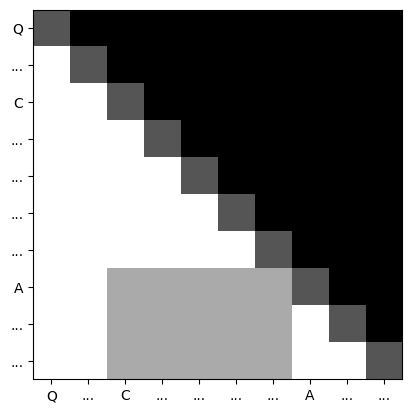

In [1]:
import matplotlib.pyplot as plt
import numpy as np

array = np.zeros((10, 10))

for i in range(len(array)):
    for j in range(len(array[i])):
        #make a triangle
        if j < i:
            array[i][j] = 3
            if i >= 7 and j < 7 and j >= 2:
                array[i][j] = 2
        if i == j:
            array[i][j] = 1
                
plt.imshow(array, cmap='grey', interpolation='nearest')

#rename the ticks
index = ['Q', '...', 'C', '...', '...', '...', '...', 'A', '...', '...']
plt.xticks(np.arange(len(array)), index)
plt.yticks(np.arange(len(array)), index)

#save as pdf
plt.savefig('plot.pdf')


75 1


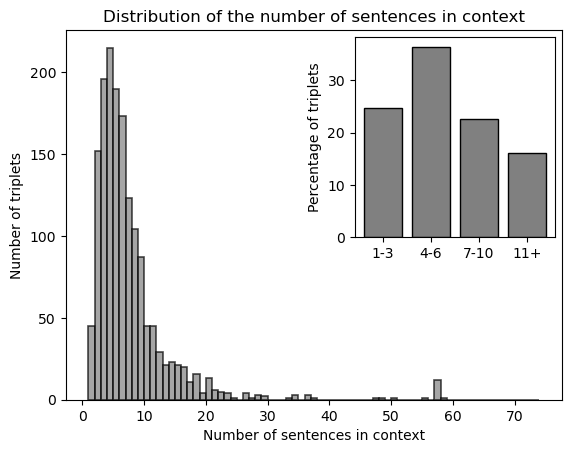

In [2]:
from nltk import sent_tokenize
import matplotlib.pyplot as plt
from processing.citation_dataset import QADataset


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    "./attention/models/results/google/gemma-2b/",
)

dataset = QADataset(
    "processing/annotated_datasets/clear_dataset.jsonl",
    no_special_tokens=True,
)

splits = dataset.to_splits(shuffle=True, seed=42)

splits = QADataset.truncate(
    splits, tokenizer, (2048, 2500)
)

context = splits["train"]["context"] + splits["val"]["context"] + splits["test"]["context"]

# count the number of sentences in each context
sentence_count = []
categories = ["1-3", "4-6", "7-10", "11+"]
counts = [0, 0, 0, 0]
for i in context:
    sentences = sent_tokenize(i)
    sentence_count.append(len(sentences))
    
    if len(sentences) <= 3:
        counts[0] += 1
    elif len(sentences) <= 6:
        counts[1] += 1
    elif len(sentences) <= 10:
        counts[2] += 1
    else:
        counts[3] += 1

for c in range(len(counts)):
    counts[c] = counts[c] / len(context) * 100
    
print(max(sentence_count), min(sentence_count))

fig, ax = plt.subplots()

ax.hist(sentence_count, bins=range(1, 75), edgecolor='black', linewidth=1.2, color='grey', alpha=0.7)
ax.set_xticks(range(0, 75, 10))
ax.set_xlabel('Number of sentences in context')
ax.set_ylabel('Number of triplets')
ax.set_title('Distribution of the number of sentences in context')



# Create a zoomed in inset of the plot
axins = inset_axes(ax, 2, 2, loc='upper right')
axins.bar(categories, counts, color='grey', edgecolor='black')
axins.set_ylabel('Percentage of triplets')


plt.savefig('plot.pdf')



41 6


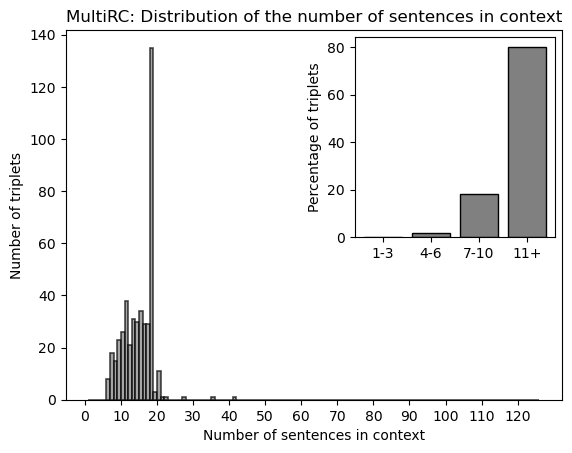

In [3]:
from nltk import sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt


from mpl_toolkits.axes_grid1.inset_locator import inset_axes


file_path = "misc/splitv2/train_456-fixedIds.json"

data = pd.read_json(file_path)

context = [data['data'][i]['paragraph']['text'] for i in range(len(data['data']))]

# count the number of sentences in each context
sentence_count = []
categories = ["1-3", "4-6", "7-10", "11+"]
counts = [0, 0, 0, 0]
for i in context:
    count = i.count("<b>Sent")
    sentence_count.append(count)
    
    if count <= 3:
        counts[0] += 1
    elif count <= 6:
        counts[1] += 1
    elif count <= 10:
        counts[2] += 1
    else:
        counts[3] += 1

for c in range(len(counts)):
    counts[c] = counts[c] / len(context) * 100
    
print(max(sentence_count), min(sentence_count))

fig, ax = plt.subplots()

ax.hist(sentence_count, bins=range(1, 127), edgecolor='black', linewidth=1.2, color='grey', alpha=0.7)
ax.set_xticks(range(0, 127, 10))
ax.set_xlabel('Number of sentences in context')
ax.set_ylabel('Number of triplets')
ax.set_title('MultiRC: Distribution of the number of sentences in context')



# Create a zoomed in inset of the plot
axins = inset_axes(ax, 2, 2, loc='upper right')
axins.bar(categories, counts, color='grey', edgecolor='black')
axins.set_ylabel('Percentage of triplets')

plt.savefig('plot.pdf')




In [4]:
ours = (0.89, 0.79, 0.74, 0.62)

mix_rc = counts
mean_rc = sum([ours[i] * mix_rc[i] for i in range(4)])
print("MultiRC: ", mean_rc)

MultiRC:  64.4561403508772


misc/wiki-pages/wiki-001.jsonl
misc/wiki-pages/wiki-002.jsonl
misc/wiki-pages/wiki-003.jsonl
misc/wiki-pages/wiki-004.jsonl
misc/wiki-pages/wiki-005.jsonl
misc/wiki-pages/wiki-006.jsonl
misc/wiki-pages/wiki-007.jsonl
misc/wiki-pages/wiki-008.jsonl
misc/wiki-pages/wiki-009.jsonl
misc/wiki-pages/wiki-010.jsonl
misc/wiki-pages/wiki-011.jsonl
misc/wiki-pages/wiki-012.jsonl
misc/wiki-pages/wiki-013.jsonl
misc/wiki-pages/wiki-014.jsonl
misc/wiki-pages/wiki-015.jsonl
misc/wiki-pages/wiki-016.jsonl
misc/wiki-pages/wiki-017.jsonl
misc/wiki-pages/wiki-018.jsonl
misc/wiki-pages/wiki-019.jsonl
misc/wiki-pages/wiki-020.jsonl
misc/wiki-pages/wiki-021.jsonl
misc/wiki-pages/wiki-022.jsonl
misc/wiki-pages/wiki-023.jsonl
misc/wiki-pages/wiki-024.jsonl
misc/wiki-pages/wiki-025.jsonl
misc/wiki-pages/wiki-026.jsonl
misc/wiki-pages/wiki-027.jsonl
misc/wiki-pages/wiki-028.jsonl
misc/wiki-pages/wiki-029.jsonl
misc/wiki-pages/wiki-030.jsonl
misc/wiki-pages/wiki-031.jsonl
misc/wiki-pages/wiki-032.jsonl
misc/wik

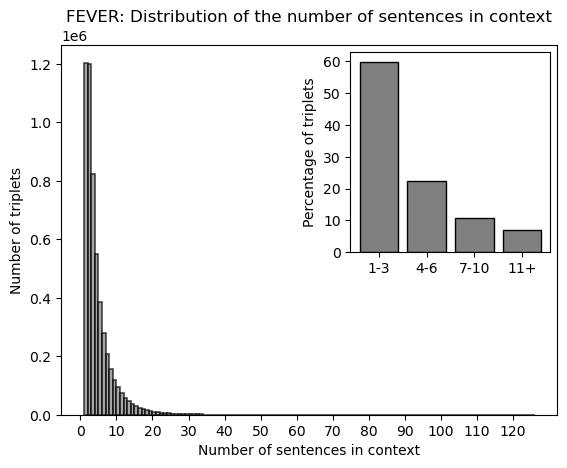

In [5]:
from nltk import sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt


from mpl_toolkits.axes_grid1.inset_locator import inset_axes

context = []
for i in range(1, 110):
    file_path = f"misc/wiki-pages/wiki-{str(i).zfill(3)}.jsonl"
    
    print(file_path)

    data = pd.read_json(file_path, lines=True)

    context += [data['text'][i] for i in range(len(data['text']))]
    
print(len(context))

# count the number of sentences in each context
sentence_count = []
categories = ["1-3", "4-6", "7-10", "11+"]
counts = [0, 0, 0, 0]
for i in context:
    sentences = sent_tokenize(i)
    sentence_count.append(len(sentences))
    
    if len(sentences) <= 3:
        counts[0] += 1
    elif len(sentences) <= 6:
        counts[1] += 1
    elif len(sentences) <= 10:
        counts[2] += 1
    else:
        counts[3] += 1

for c in range(len(counts)):
    counts[c] = counts[c] / len(context) * 100
    
print(max(sentence_count), min(sentence_count))

fig, ax = plt.subplots()

ax.hist(sentence_count, bins=range(1, 127), edgecolor='black', linewidth=1.2, color='grey', alpha=0.7)
ax.set_xticks(range(0, 127, 10))
ax.set_xlabel('Number of sentences in context')
ax.set_ylabel('Number of triplets')
ax.set_title('FEVER: Distribution of the number of sentences in context')



# Create a zoomed in inset of the plot
axins = inset_axes(ax, 2, 2, loc='upper right')
axins.bar(categories, counts, color='grey', edgecolor='black')
axins.set_ylabel('Percentage of triplets')

plt.savefig('plot.pdf')




In [6]:
ours = (0.89, 0.79, 0.74, 0.62)

mix_fever = counts
mean_fever = sum([ours[i] * mix_fever[i] for i in range(4)])
print("FEVER: ", mean_fever)

FEVER:  83.27689333609278


misc/movies/docs/posR_399.txt
misc/movies/docs/negR_072.txt
misc/movies/docs/negR_786.txt
misc/movies/docs/posR_958.txt
misc/movies/docs/posR_506.txt
misc/movies/docs/negR_662.txt
misc/movies/docs/posR_573.txt
misc/movies/docs/posR_063.txt
misc/movies/docs/posR_051.txt
misc/movies/docs/negR_384.txt
misc/movies/docs/negR_266.txt
misc/movies/docs/posR_493.txt
misc/movies/docs/negR_664.txt
misc/movies/docs/negR_147.txt
misc/movies/docs/negR_758.txt
misc/movies/docs/negR_348.txt
misc/movies/docs/negR_980.txt
misc/movies/docs/posR_089.txt
misc/movies/docs/posR_250.txt
misc/movies/docs/posR_374.txt
misc/movies/docs/negR_394.txt
misc/movies/docs/negR_982.txt
misc/movies/docs/negR_388.txt
misc/movies/docs/negR_721.txt
misc/movies/docs/negR_895.txt
misc/movies/docs/negR_879.txt
misc/movies/docs/posR_666.txt
misc/movies/docs/negR_753.txt
misc/movies/docs/negR_835.txt
misc/movies/docs/posR_429.txt
misc/movies/docs/negR_550.txt
misc/movies/docs/posR_697.txt
misc/movies/docs/negR_754.txt
misc/movie

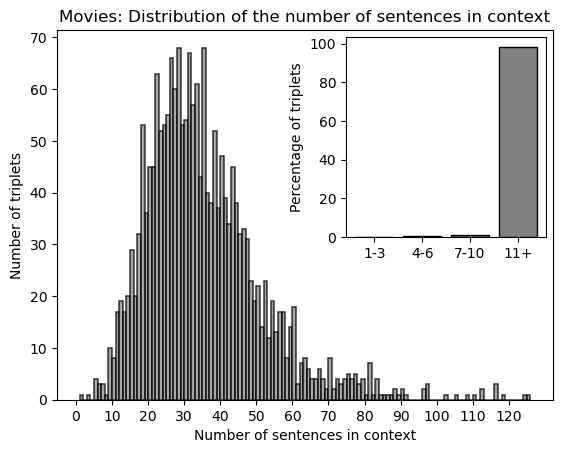

In [7]:
from nltk import sent_tokenize
import matplotlib.pyplot as plt

from glob import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

context = []
for file_path in glob("misc/movies/docs/*.txt"):
    
    print(file_path)

    with open(file_path, 'r') as file:
        data = file.read()

    context += [data]
    
print(len(context))

# count the number of sentences in each context
sentence_count = []
categories = ["1-3", "4-6", "7-10", "11+"]
counts = [0, 0, 0, 0]
for i in context:
    sentences = sent_tokenize(i)
    sentence_count.append(len(sentences))
    
    if len(sentences) <= 3:
        counts[0] += 1
    elif len(sentences) <= 6:
        counts[1] += 1
    elif len(sentences) <= 10:
        counts[2] += 1
    else:
        counts[3] += 1

for c in range(len(counts)):
    counts[c] = counts[c] / len(context) * 100
    
print(max(sentence_count), min(sentence_count))

fig, ax = plt.subplots()

ax.hist(sentence_count, bins=range(1, 127), edgecolor='black', linewidth=1.2, color='grey', alpha=0.7)
ax.set_xticks(range(0, 127, 10))
ax.set_xlabel('Number of sentences in context')
ax.set_ylabel('Number of triplets')
ax.set_title('Movies: Distribution of the number of sentences in context')



# Create a zoomed in inset of the plot
axins = inset_axes(ax, 2, 2, loc='upper right')
axins.bar(categories, counts, color='grey', edgecolor='black')
axins.set_ylabel('Percentage of triplets')

plt.savefig('plot.pdf')




In [8]:
ours = (0.89, 0.79, 0.74, 0.62)

mix_rc = counts
mean_rc = sum([ours[i] * mix_rc[i] for i in range(4)])
print("Movies: ", mean_rc)

Movies:  62.2185


In [9]:
precision = 0.917
recall = 0.911

iou = 1 / (1 / precision + 1 / recall - 1)
print("Fever: ", iou)

Fever:  0.8416039282177447


In [12]:
precision = 0.944
recall = 0.942

iou = 1 / (1 / precision + 1 / recall - 1)
print("Fever: ", iou)

Fever:  0.8921456891985168


In [10]:
precision = 0.658
recall = 0.423

iou = 1 / (1 / precision + 1 / recall - 1)
print("MultiRC: ", iou)

MultiRC:  0.34676191591521255


In [13]:
precision = 0.797
recall = 0.794

iou = 1 / (1 / precision + 1 / recall - 1)
print("MultiRC: ", iou)

MultiRC:  0.6604361175643042


In [11]:
precision = 0.869
recall = 0.624

iou = 1 / (1 / precision + 1 / recall - 1)
print("Movies: ", iou)

Movies:  0.5703491160606851


In [14]:
precision = 0.800
recall = 0.695

iou = 1 / (1 / precision + 1 / recall - 1)
print("Movies: ", iou)

Movies:  0.5921192758253462
